## CREDIT CARD FRAUD DETECTION

Objective - Bulid a model to detect fraudulent credit card transactions. Use a dataset containing
information about credit card transactions, and experiment with algorithms like logistic regration,
Decission Trees, or Random forests to classify transtions as fradulent or legitimate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

## setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')

C:\Users\Tirth\AppData\Local\Temp\ipykernel_9756\3110838591.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### IMPORT THE DATA SETS

In [4]:
ftest = pd.read_csv(r'T:\Project\fraudTest.csv')

In [5]:
ftrain = pd.read_csv(r'T:\Project\fraudTrain.csv')

In [6]:
ftest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
ftrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
print("Database dimention - FraudTest :",ftest.shape)
print("Database dimention - FraudTrain :",ftrain.shape)

Database dimention - FraudTest : (555719, 23)
Database dimention - FraudTrain : (1296675, 23)


In [9]:
ftest.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
ftrain.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
ftest.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [12]:
ftrain.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### DATA CLEANING 

In [13]:
print(ftest.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [14]:
print(ftrain.isnull().sum())


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


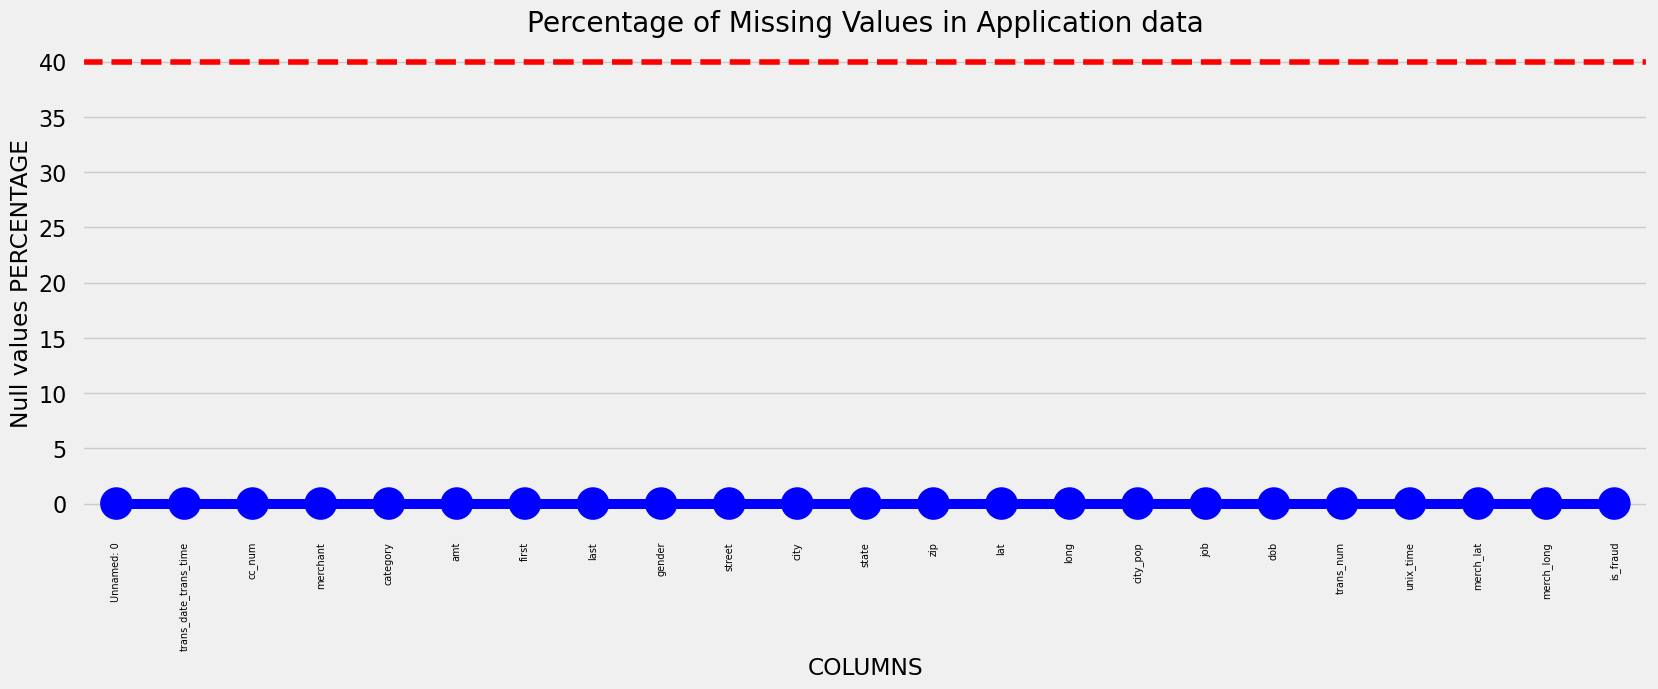

In [15]:
null_ftest = pd.DataFrame((ftest.isnull().sum())*100/ftest.shape[0]).reset_index()
null_ftest.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax =sns.pointplot(x="Column Name", y="Null Values Percentage",data=null_ftest, color='blue')
plt.xticks(rotation =90, fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application data")
plt.ylabel("Null values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

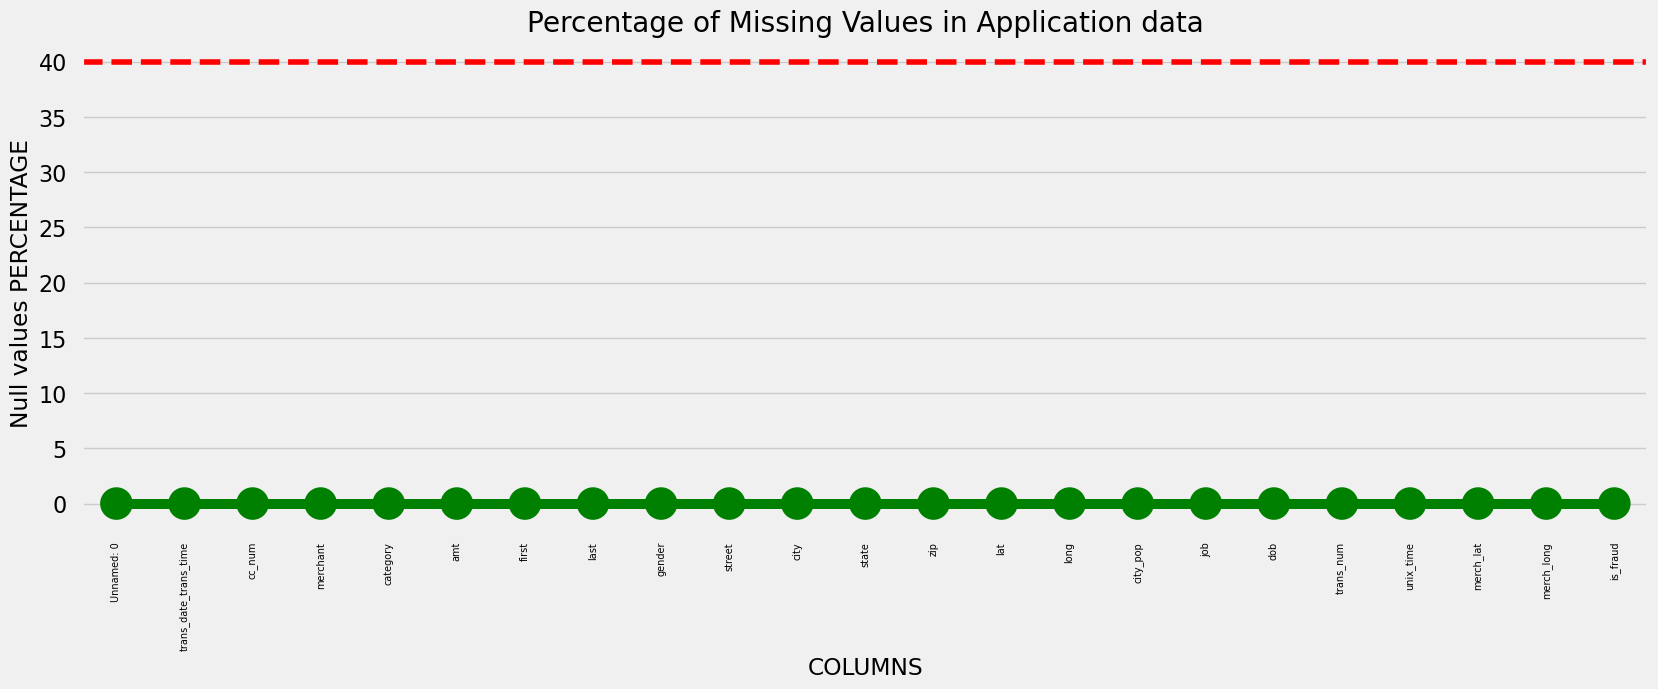

In [16]:
null_ftrain = pd.DataFrame((ftrain.isnull().sum())*100/ftrain.shape[0]).reset_index()
null_ftrain.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax =sns.pointplot(x="Column Name", y="Null Values Percentage",data=null_ftrain, color='green')
plt.xticks(rotation =90, fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application data")
plt.ylabel("Null values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [17]:
ftest["is_fraud"].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [19]:
# 0 - Normal transaction and 1 - Fraudulent transcation
legit = ftest[ftest.is_fraud == 0]
fraud = ftest[ftest.is_fraud == 1]

In [20]:
print(legit.shape)
print(fraud.shape)

(553574, 23)
(2145, 23)


In [21]:
#statistical measure of the data
legit.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [22]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [23]:
#compare the values for both transactions 
ftest.groupby("is_fraud").mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,88313.692365,1.380683e+09,38.540954,-90.230474
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


### Under sampling 
  Number of fradulent transactions - 2145

In [24]:
legit_sample = legit.sample(n=2145)

In [25]:
#concatenate two dataframs
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [26]:
new_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
345842,345842,2020-11-01 20:50:11,4755696071492,"fraud_Dare, Fritsch and Zboncak",health_fitness,93.95,Robert,Evans,M,01892 Patricia Vista Apt. 828,Sachse,TX,75048,32.9643,-96.6012,20328,Site engineer,1985-06-20,9844b52bf856011bebc0e89223218a20,1383339011,32.707371,-96.321924,0
53559,53559,2020-07-09 19:16:17,36722699017270,fraud_Mayert Group,shopping_pos,29.42,Jessica,Perez,F,8172 Robertson Parkways Suite 072,Superior,AZ,85173,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,22ac74746526b1628d889130a351401d,1373397377,33.799615,-111.316047,0
362399,362399,2020-11-09 02:34:52,38295635583927,fraud_Collier Inc,grocery_net,43.09,Candice,Brown,F,9412 Harris Mews,O Brien,TX,79539,33.3749,-99.8473,178,Warden/ranger,1983-06-14,d2cffcc7c7bc865315f6797cdf9fa4b3,1383964492,32.609041,-99.264946,0
68553,68553,2020-07-14 16:33:28,30518206766474,fraud_Kozey-Boehm,shopping_net,4.97,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,017158a14c3bbe308ccc8e7fe5474671,1373819608,36.402284,-90.480737,0
195536,195536,2020-08-29 08:04:06,3546897637165774,fraud_Barrows PLC,shopping_pos,7.59,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1956-05-30,01e58626eb17e79f12c55df381a647c2,1377763446,32.487759,-97.321990,0


In [27]:
new_dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1
517571,517571,2020-12-22 23:13:39,2242176657877538,fraud_Jaskolski-Vandervort,misc_net,766.38,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,44292cbc51e37dc018ee6a988a4bc426,1387754019,33.771462,-90.651342,1


In [28]:
new_dataset["is_fraud"].value_counts()

0    2145
1    2145
Name: is_fraud, dtype: int64

In [29]:
new_dataset.groupby("is_fraud").mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,275313.820979,3.895850e+17,67.695389,48679.862005,38.434405,-89.992116,90128.913287,1.380597e+09,38.440519,-89.982651
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


### Splitting the data into features and target

In [30]:
X = new_dataset.drop(columns="is_fraud", axis=1)
Y = new_dataset["is_fraud"]

In [31]:
print(X)

        Unnamed: 0 trans_date_trans_time            cc_num                             merchant        category      amt    first      last gender                             street          city state    zip      lat      long  city_pop                     job         dob                         trans_num   unix_time  merch_lat  merch_long
345842      345842   2020-11-01 20:50:11     4755696071492      fraud_Dare, Fritsch and Zboncak  health_fitness    93.95   Robert     Evans      M      01892 Patricia Vista Apt. 828        Sachse    TX  75048  32.9643  -96.6012     20328           Site engineer  1985-06-20  9844b52bf856011bebc0e89223218a20  1383339011  32.707371  -96.321924
53559        53559   2020-07-09 19:16:17    36722699017270                   fraud_Mayert Group    shopping_pos    29.42  Jessica     Perez      F  8172 Robertson Parkways Suite 072      Superior    AZ  85173  33.2887 -111.0985      2872      Petroleum engineer  1987-10-28  22ac74746526b1628d889130a351401d  13733

In [32]:
print(Y)

345842    0
53559     0
362399    0
68553     0
195536    0
         ..
517197    1
517274    1
517341    1
517529    1
517571    1
Name: is_fraud, Length: 4290, dtype: int64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(4290, 22) (3432, 22) (858, 22)


In [35]:
# Converting the datetime column to datetime type
ftrain['trans_date_trans_time'] = pd.to_datetime(ftrain['trans_date_trans_time'])
ftest['trans_date_trans_time'] = pd.to_datetime(ftest['trans_date_trans_time'])

# Extracting useful information from the datetime column
ftrain['hour'] = ftrain['trans_date_trans_time'].dt.hour
ftrain['day'] = ftrain['trans_date_trans_time'].dt.day
ftrain['month'] = ftrain['trans_date_trans_time'].dt.month
ftrain['year'] = ftrain['trans_date_trans_time'].dt.year

ftest['hour'] = ftest['trans_date_trans_time'].dt.hour
ftest['day'] = ftest['trans_date_trans_time'].dt.day
ftest['month'] = ftest['trans_date_trans_time'].dt.month
ftest['year'] = ftest['trans_date_trans_time'].dt.year

# Drop the original datetime column
ftrain = ftrain.drop(columns=['trans_date_trans_time'], axis=1)
ftest = ftest.drop(columns=['trans_date_trans_time'], axis=1)

In [36]:
# Check for non-numeric columns
non_numeric_columns = ftrain.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

# Drop non-numeric columns
ftrain = ftrain.drop(columns=non_numeric_columns, axis=1)
ftest = ftest.drop(columns=non_numeric_columns, axis=1)


Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], dtype='object')


In [37]:
# Splitting the data into features and target
X_train = ftrain.drop(columns="is_fraud", axis=1)
Y_train = ftrain["is_fraud"]
X_test = ftest.drop(columns="is_fraud", axis=1)
Y_test = ftest["is_fraud"]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training 
Logistic Regression 

In [38]:
# Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)


# Predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(Y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(Y_test, y_pred_log_reg))

Logistic Regression Accuracy:  0.9961401355721147
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



### we can see that the accuracy is 99.6% 
similarly we can check the ftrain data set 

In [39]:
ftrain["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [40]:
# 0 - Normal transaction and 1 - Fraudulent transcation
legit = ftrain[ftrain.is_fraud == 0]
fraud = ftrain[ftrain.is_fraud == 1]

In [41]:
print(legit.shape)
print(fraud.shape)

(1289169, 15)
(7506, 15)


In [42]:
#statistical measure of the data
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [43]:
#compare the values for both transactions 
ftrain.groupby("is_fraud").mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,day,month,year
is_fraud,,,,,,,,,,,,,,
0,648473.169029,4.172901e+17,67.667110,48805.107481,38.536888,-90.228142,88775.228137,1.349249e+09,38.536659,-90.228274,12.797679,15.585386,6.145386,2019.286649
1,624949.724354,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808,14.037836,16.033173,5.586331,2019.304556


In [44]:
##Number of fradulent transactions - 7506

In [46]:
legit_sample1 = legit.sample(n=7506)

In [47]:
#concatenate two dataframs
new_dataset1 = pd.concat([legit_sample, fraud], axis=0)

In [48]:
new_dataset1.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,year
1198950,1198950,376445266762684,4.67,69165,41.1558,-101.1360,1789,1368712937,41.842825,-100.188992,0,14,16,5,2020
1243407,1243407,213124978348176,89.44,14711,42.3200,-78.0943,1766,1370144635,42.761561,-77.137895,0,3,2,6,2020
122399,122399,3567697931646329,4.09,12534,42.2470,-73.7552,17867,1331327701,42.395353,-72.849942,0,21,9,3,2019
323710,323710,3513506355699497,137.43,39157,32.4122,-90.1207,24645,1338741792,31.558512,-90.756177,0,16,3,6,2019
812909,812909,3561212938177173,61.45,36853,32.8224,-85.7704,8269,1354894005,32.223876,-85.939128,0,15,7,12,2019


In [49]:
new_dataset1.tail()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,year
1295399,1295399,3524574586339330,977.01,32960,27.6330,-80.4031,105638,1371776408,26.888686,-80.834389,1,1,21,6,2020
1295491,1295491,3524574586339330,1210.91,32960,27.6330,-80.4031,105638,1371779615,28.216707,-79.855648,1,1,21,6,2020
1295532,1295532,4005676619255478,10.24,70726,30.4590,-90.9027,71335,1371781016,29.700456,-91.361632,1,2,21,6,2020
1295666,1295666,3560725013359375,21.69,79759,31.8599,-102.7413,23,1371785180,32.675272,-103.484949,1,3,21,6,2020
1295733,1295733,4005676619255478,10.20,70726,30.4590,-90.9027,71335,1371787186,31.363252,-89.932309,1,3,21,6,2020


In [50]:
new_dataset1["is_fraud"].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [51]:
new_dataset1.groupby("is_fraud").mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,day,month,year
is_fraud,,,,,,,,,,,,,,
0,652584.227418,3.971185e+17,66.430721,49152.729150,38.534314,-90.367697,85613.776712,1.349394e+09,38.528115,-90.361005,12.735811,15.667999,6.134692,2019.291900
1,624949.724354,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808,14.037836,16.033173,5.586331,2019.304556


#### Again we split the dataset

In [52]:
A = new_dataset1.drop(columns="is_fraud", axis=1)
B = new_dataset1["is_fraud"]

In [53]:
print(A)

         Unnamed: 0            cc_num      amt    zip      lat      long  city_pop   unix_time  merch_lat  merch_long  hour  day  month  year
1198950     1198950   376445266762684     4.67  69165  41.1558 -101.1360      1789  1368712937  41.842825 -100.188992    14   16      5  2020
1243407     1243407   213124978348176    89.44  14711  42.3200  -78.0943      1766  1370144635  42.761561  -77.137895     3    2      6  2020
122399       122399  3567697931646329     4.09  12534  42.2470  -73.7552     17867  1331327701  42.395353  -72.849942    21    9      3  2019
323710       323710  3513506355699497   137.43  39157  32.4122  -90.1207     24645  1338741792  31.558512  -90.756177    16    3      6  2019
812909       812909  3561212938177173    61.45  36853  32.8224  -85.7704      8269  1354894005  32.223876  -85.939128    15    7     12  2019
...             ...               ...      ...    ...      ...       ...       ...         ...        ...         ...   ...  ...    ...   ...
129539

In [54]:
print(B)

1198950    0
1243407    0
122399     0
323710     0
812909     0
          ..
1295399    1
1295491    1
1295532    1
1295666    1
1295733    1
Name: is_fraud, Length: 15012, dtype: int64


In [55]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, stratify=B, random_state=42)

In [57]:
print(A.shape, A_train.shape, A_test.shape)

(15012, 14) (12009, 14) (3003, 14)


In [58]:
# Splitting the data into features and target
A_train = ftrain.drop(columns="is_fraud", axis=1)
B_train = ftrain["is_fraud"]
A_test = ftest.drop(columns="is_fraud", axis=1)
B_test = ftest["is_fraud"]

# Standardize the features
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

In [59]:
# Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(A_train, B_train)


# Predictions
y_pred_log_reg = log_reg_model.predict(A_test)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(B_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(B_test, y_pred_log_reg))

Logistic Regression Accuracy:  0.9961401355721147
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

